In [1]:
from Trainmodel import traindcnncoxmodel,traincnncoxmodel
from utils import avgcindex

2024-04-10 17:16:22.842360: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" 
import numpy as np
import pandas as pd
from model import cnncox,dcnncox,nncox
from earlystoping import MyCallback
from utils import nll,avgcindex,setup_seed
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold,train_test_split
from lifelines.utils import concordance_index
import matplotlib.pyplot as plt

In [3]:



conv1_size=(1, 10)
#conv2_size=(10, 1)
input_shape = (10, 10, 1)
le, wi = 10,10
seed=42

cancer_name='LGG'
Cindex=[]

current_path='../data/100'
output_path=current_path+'/' + cancer_name + "100.csv"
save_path="../save model/100/1D-CNNCox/"






conv1=128
dense=128
        
#score_tst_list = traincnncoxmodel(output_path,cancer_name,
#                                  conv1,conv1_size,
#                                  conv2,conv2_size,
#                                  dense,input_shape,save_path,
#                                  le, wi,seed) 

#Cindex.append(score_tst_list)
#numbers=[422,543,596,514,551,539,454]
#avgci = avgcindex(Cindex,cancer_types,numbers)
#print("Micro-average C-index:",avgci) 



setup_seed(seed)
#data
df_exp=pd.read_csv(output_path,index_col=0)
gene_exp=df_exp.dropna(axis=0,subset = ["OS", "OS.time"])
E=np.array(gene_exp["OS"])
Y=np.array(gene_exp["OS.time"])
X=np.array(gene_exp)
X=X.astype('float64')
X=X[:,2:]
scaler=StandardScaler().fit(X)
X=scaler.transform(X)
score_tst_list = []
score_dev_list = []



In [4]:
E

array([1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1.

In [5]:
Y.shape

(514,)

In [6]:
E.shape

(514,)

In [7]:
X.shape

(514, 100)

Training...
Early stopping at 22
[Best:on_train_end]

=========================== [Best cindex (epoch = 1)] cindex=0.887097 ==================================


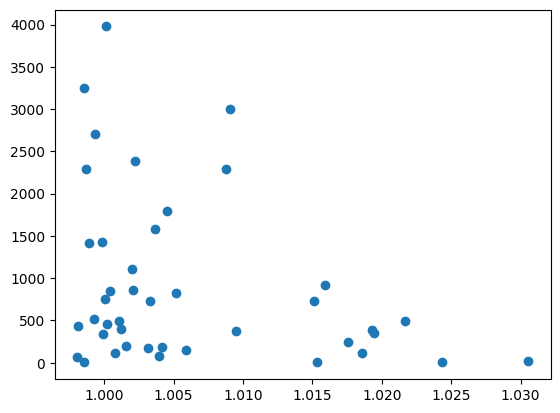

Training...
Early stopping at 22
[Best:on_train_end]

=========================== [Best cindex (epoch = 1)] cindex=0.857988 ==================================


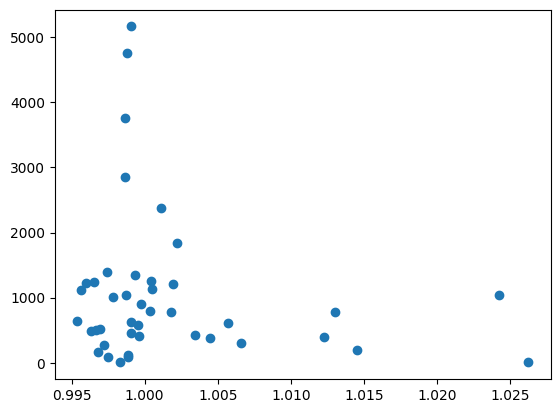

Training...
Early stopping at 24
[Best:on_train_end]

=========================== [Best cindex (epoch = 3)] cindex=0.825726 ==================================


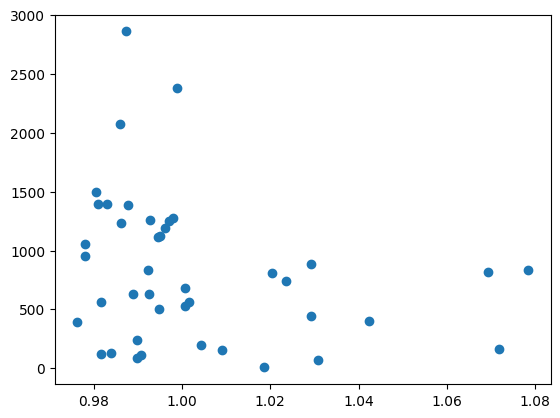

Training...
Early stopping at 26
[Best:on_train_end]

=========================== [Best cindex (epoch = 5)] cindex=0.869565 ==================================


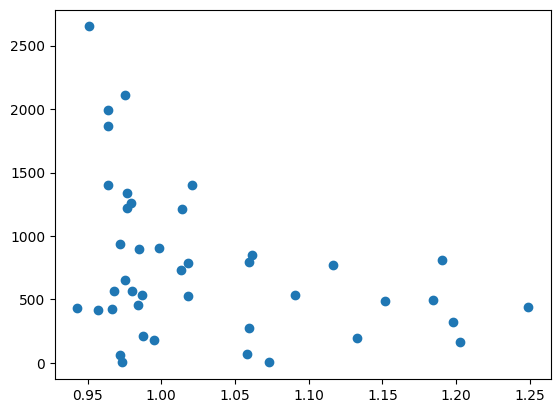

Training...
Early stopping at 40
[Best:on_train_end]

=========================== [Best cindex (epoch = 19)] cindex=0.880829 ==================================


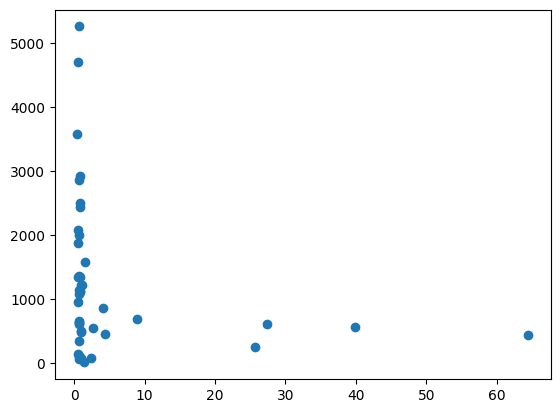

In [12]:

for i in range(0,1):
        ci_tst_list = []
        ci_dev_list = []
        kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
        fold = 0
        for trn_index, tst_index in kf.split(X,E):
            fold +=1
            x_tst=X[tst_index]
            c_tst=E[tst_index]
            s_tst=Y[tst_index]

            x_trn, x_dev ,c_trn, c_dev , s_trn, s_dev=train_test_split(
                X[trn_index],E[trn_index],Y[trn_index],test_size=0.1,
                stratify=E[trn_index],random_state=1)

            sort_idx = np.argsort(s_trn)[::-1]
            x_trn = x_trn[sort_idx]
            s_trn = s_trn[sort_idx]
            c_trn = c_trn[sort_idx]

            x_trn = np.reshape(x_trn, (-1, le, wi))
            x_dev = np.reshape(x_dev, (-1, le, wi))
            x_tst = np.reshape(x_tst, (-1, le, wi))

            x_trn = x_trn.reshape(x_trn.shape[0], le, wi, 1)
            x_dev = x_dev.reshape(x_dev.shape[0], le, wi, 1)
            x_tst = x_tst.reshape(x_tst.shape[0], le, wi, 1)
        
            #fit
            data = (x_trn, c_trn, s_trn, x_dev, c_dev, s_dev)
            modelpath = save_path+"%s_fold_%s_repeat_%s_%s.hdf5" % (
                cancer_name,fold,i+1,le*wi)
            checkpoint = MyCallback(modelpath, data)
            
            
            model = dcnncox(conv1,conv1_size,dense,input_shape)

            model.compile(loss=[nll(c_trn, np.sum(c_trn))],
                          optimizer="adam")
            
            print('Training...')
            history = model.fit(x_trn, s_trn, batch_size=len(x_trn),
                                epochs=1000,verbose=0,callbacks=[checkpoint], shuffle=False)
            model.load_weights(modelpath)
            
            hr_pred=model.predict(x_dev,batch_size=1, verbose=0)
            hr_pred=np.exp(hr_pred)

            fig,ax = plt.subplots(1)
            ax.scatter(hr_pred,s_dev)
            plt.show()
            
            ci_dev=concordance_index(s_dev,-hr_pred,c_dev)
            hr_pred2=model.predict(x_tst,batch_size=1, verbose=0)
            hr_pred2=np.exp(hr_pred2)
            ci_tst=concordance_index(s_tst,-hr_pred2,c_tst)
            ci_dev_list.append(ci_dev)
            ci_tst_list.append(ci_tst)
            
        score_dev_list.append(ci_dev_list)
        score_tst_list.append(ci_tst_list)